In [36]:
import numpy as np

## load data
data = np.loadtxt("./data/lr_data1.txt", delimiter=",")
X, y = data[:, 0], data[:, 1]
m = X.size
## expand dimention for theta0
X = np.stack([np.ones(m), X], axis=1)

In [37]:
## compute cost J(theta) of LR
def computeCost(X, y, theta):
  m = y.size
  J = 0;
  h = np.dot(X, theta.transpose())
  
  for i in range(m):
    J = J + (1 / (2 * m)) * np.square(h[i] - y[i])

  return J

In [38]:
## test -> compute cost
theta = np.array([-1,2])
J = computeCost(X, y, theta)
print("when theta : [-1, 2], J is", J)

when theta : [-1, 2], J is 54.24245508201239


In [39]:
## Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
  theta = theta.copy()
  costs = []
  m = y.size
  n = theta.size
  for iter in range(iters):
    h = np.dot(X, theta.transpose())
    cost = computeCost(X, y, theta)
    costs.append(cost)
    for j in range(n):
      temp = 0
      for i in range(m):
        temp += ((h[i] - y[i]) * X[i][j])
      theta[j] = theta[j] - alpha * (1 / m) * temp

## append last iter 
  costs.append(computeCost(X, y, theta))

  return theta, costs

In [40]:
## test -> Gradient Descent
theta = np.zeros(2)
alpha = 0.01
iters = 1500

theta, costs = gradientDescent(X, y, theta, alpha, iters)

print("After 1500 iters, theta is {:.4f}, {:.4f}".format(*theta))


After 1500 iters, theta is -3.6303, 1.1664


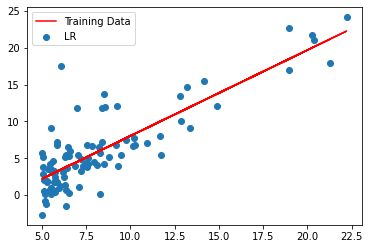

In [48]:
# plot the linear fit
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta.transpose()), c = 'r')
plt.legend(["Training Data", "LR"])


In [ ]:
# plot cost curve
plt.plot(X[:, 1], np.dot(X, theta.transpose()), c = 'r')
plt.legend(["Training Data", "LR"])